### Es 1
Hai a disposizione un file `data.csv` contenente dati mensili di passeggeri con due colonne:

- `date`: data in formato `YYYY-MM` (mese/anno)
- `passengers`: numero di passeggeri per quel mese


Costruisci un modello di **regressione polinomiale** che approssima l’andamento del numero di passeggeri nel tempo.

1. Carica il dataset.
2. Convertilo in un formato numerico utilizzando una colonna `mese_numerico` che conti i mesi a partire da gennaio 1949.
3. Applica una regressione polinomiale (grado a tua scelta).
4. Calcola l’RMSE tra i valori reali e quelli predetti.
5. Visualizza i dati reali e la curva stimata con Plotly.

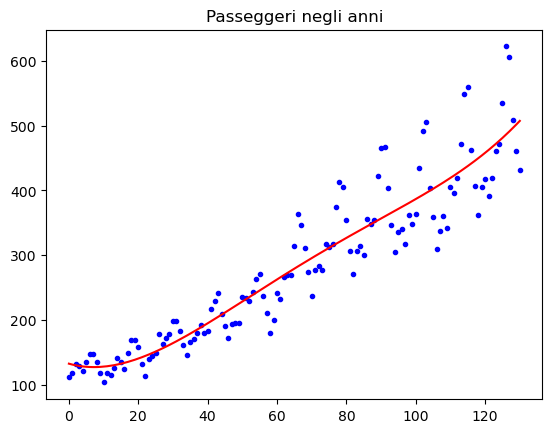

RMSE:  44.60520726560634


ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'mode': 'markers',
              'name': 'Passeggeri negli anni',
              'type': 'scatter',
              'x': {'bdata': ('AAABAAIAAwAEAAUABgAHAAgACQAKAA' ... 'B5AHoAewB8AH0AfgB/AIAAgQCCAA=='),
                    'dtype': 'i2'},
              'y': {'bdata': ('AAAAAAAAXEAAAAAAAIBdQAAAAAAAgG' ... 'AAwH9AAAAAAADQfEAAAAAAAAB7QA=='),
                    'dtype': 'f8'}},
             {'mode': 'lines',
              'name': 'Regressione polinomiale',
              'type': 'scatter',
              'x': {'bdata': ('AAABAAIAAwAEAAUABgAHAAgACQAKAA' ... 'B5AHoAewB8AH0AfgB/AIAAgQCCAA=='),
                    'dtype': 'i2'},
              'y': {'bdata': ('zM1v+A2gYEDb23l/BnNgQMum515UTW' ... 'yJBX9AmEWfJuJbf0CmjtynsbR/QA=='),
                    'dtype': 'f8'}}],
    'layout': {'template': '...', 'title': {'text': 'Numero passeggeri'}, 'xaxis': {'title': {'text': 'Numero del mese'}}}
})

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import plotly.graph_objects as go
import nbformat

df = pd.read_csv("C:/Users/celes/OneDrive/Desktop/Laboratorio di programmazione 2/data (1).csv")
df=df.dropna()

#conta i mesi
df["date"]=pd.to_datetime(df["date"])
df["mese_numerico"]=range(len(df))
df.drop("date", axis=1, inplace=True)
df.head()

#regressione polinomiale
y=np.array(df["passengers"])
x=np.array(df["mese_numerico"])

coeff = np.polyfit(x,y, deg=4)
model=np.poly1d(coeff)
pred=model(x)

plt.scatter(x,y, color="blue", marker=".")
plt.plot(x, pred, color="red")
plt.title("Passeggeri negli anni")
plt.show()

#rmse
rmse = np.sqrt(mean_squared_error(y, pred))
print("RMSE: ", rmse)

#grafico con plotly
fig = go.Figure()
fig.add_trace(go.Scatter(x=x, y=y, name="Passeggeri negli anni", mode="markers"))
fig.add_trace(go.Scatter(x=x, y=pred, name="Regressione polinomiale", mode="lines"))

fig.update_layout(xaxis_title="Numero del mese", title="Numero passeggeri")

### Es2. 
Costruisci una web app con Dash che permette all’utente di scegliere il grado del polinomio per adattare un modello di regressione ai dati non lineari e vedere il risultato aggiornarsi dinamicamente.


1. Genera 100 punti x tra -3 e 3.

2. Calcola ad esempio y = x³ - x + rumore.

3. Costruisci un'interfaccia Dash con:
    - uno slider per scegliere il grado del polinomio (1–10),
    - un grafico Plotly che mostra i dati e la curva stimata.

4. Usa PolynomialFeatures + LinearRegression da scikit-learn per stimare la curva

In [97]:
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import plotly.graph_objects as go


#100 numeri casuali
x=np.linspace(-3,3,100)

#y=x^3-x+rumore
rumore=np.random.normal(loc=0, scale=1, size=x.shape)
y = x**3 - x + rumore

app=dash.Dash(__name__)

app.layout = html.Div([
    html.H2("Seleziona grado slider"),

    dcc.Slider(
        id='grado-slider',
        min=1,
        max=10,
        value=1,
        step=1,
        marks={i: str(i) for i in range(1,11)},
        tooltip={"placement": "bottom", "always_visible":True}
    ),

    dcc.Graph(id='plot-polynomial')    
])

@app.callback(
    Output('plot-polynomial', 'figure'),
    Input('grado-slider', 'value')
)

def genera_grafico(grado):
    xx=x.reshape(-1,1)
    poly = PolynomialFeatures(degree=grado)
    xp = poly.fit_transform(xx)

    model=LinearRegression()
    model.fit(xp, y)
    pred=model.predict(xp)

    fig=go.Figure()
    fig.add_trace(go.Scatter(x=x, y=y, mode="markers", name="Dati", marker_color="blue"))
    fig.add_trace(go.Scatter(x=x, y=pred, mode="lines", name=f"Regressione grado {grado}", line_color="red"))
    
    fig.update_layout(title="Regressione polinomiale",
                      xaxis_title="x",
                      yaxis_title="y",
                      template="plotly_white")
    
    return fig

In [98]:
if __name__ == '__main__':
    app.run_server(debug=True, port=8051)